<a href="https://colab.research.google.com/github/thakur1899/Colab/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import *
import matplotlib.pyplot as plt

**Creating the Data**

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
path

PosixPath('/root/.fastai/data/mnist_png')

In [0]:
data= ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, valid_pct = 0.2)

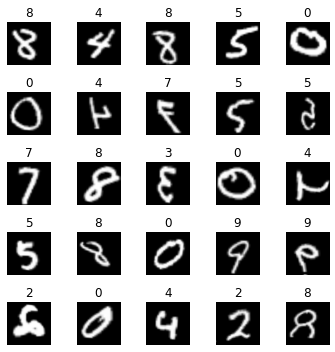

In [5]:
data.show_batch(row=3,figsize=(5,5))

In [6]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

**Training the Resnet34**

In [7]:
model_34 = cnn_learner(data,models.resnet34,metrics=accuracy)  #metrics can be accuracy or error_rate

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [8]:
model_34.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.282829,0.142195,0.954143,06:20
1,0.140051,0.076404,0.974929,06:06
2,0.093967,0.052338,0.983143,06:04
3,0.077255,0.040374,0.987429,06:10
4,0.075507,0.039675,0.987429,06:13


In [0]:
model_34.save('stage-1-resnet34')

**Interpretation from classifier**

In [10]:
intrp = ClassificationInterpretation.from_learner(model_34)

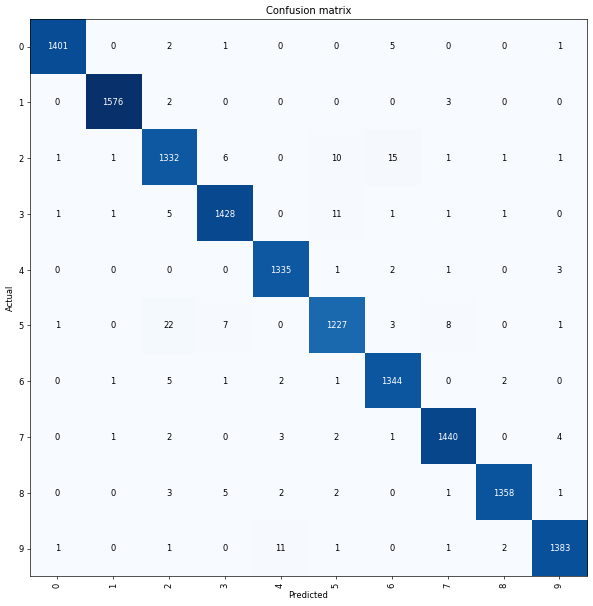

In [11]:
intrp.plot_confusion_matrix(figsize=(10,10),dpi=60)

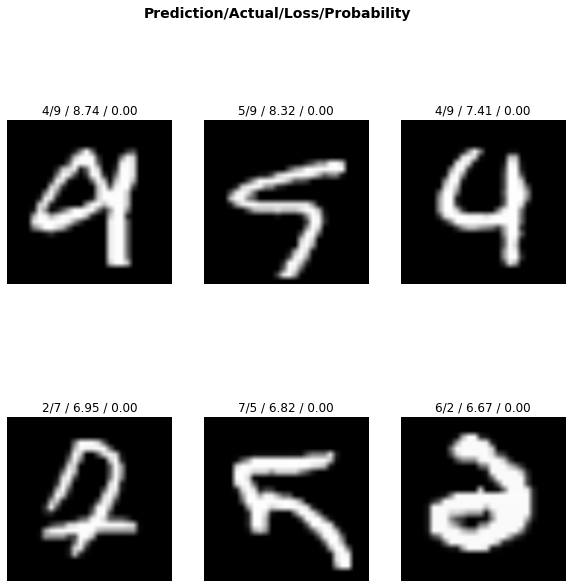

In [12]:
intrp.plot_top_losses(6,figsize=(10,10))

In [13]:
intrp.most_confused(min_val=2)

[('5', '2', 22),
 ('2', '6', 15),
 ('3', '5', 11),
 ('9', '4', 11),
 ('2', '5', 10),
 ('5', '7', 8),
 ('5', '3', 7),
 ('2', '3', 6),
 ('0', '6', 5),
 ('3', '2', 5),
 ('6', '2', 5),
 ('8', '3', 5),
 ('7', '9', 4),
 ('1', '7', 3),
 ('4', '9', 3),
 ('5', '6', 3),
 ('7', '4', 3),
 ('8', '2', 3),
 ('0', '2', 2),
 ('1', '2', 2),
 ('4', '6', 2),
 ('6', '4', 2),
 ('6', '8', 2),
 ('7', '2', 2),
 ('7', '5', 2),
 ('8', '4', 2),
 ('8', '5', 2),
 ('9', '8', 2)]

**Fine Tuning**

In [0]:
model_34.unfreeze()

model_34.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time


In [0]:
model_34.load('stage-1-resnet34')
model_34.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


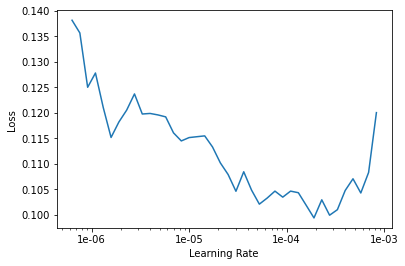

In [0]:
model_34.recorder.plot()

In [0]:
model_34.fit_one_cycle(5, max_lr=slice(1e-5, 1e-4))

For accuracy 